In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Data/main.csv")
data.head()

,url,UsingIp,longUrl,shortUrl,symbol,redirecting,prefixSuffix,SubDomains,https,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,Label
0,https://usps.searchgo.top/go/TrackConfirmAction,1,1,1,1,1,1,0,1,1,...,1,1,-1,-1,-1,-1,-1,1,1,-1
1,https://supportteam3015623.io.vn/,1,1,1,1,1,1,0,1,-1,...,1,1,-1,-1,-1,-1,-1,-1,1,-1
2,https://bt-109056.weeblysite.com/,1,1,1,1,1,-1,0,1,1,...,1,1,-1,1,1,-1,-1,1,1,-1
3,https://cloudflare-ipfs.com/ipfs/bafybeiafph6h...,1,-1,1,1,1,-1,1,1,1,...,1,1,-1,1,1,-1,-1,-1,1,-1
4,https://northlandpaddlers.org/blog/Meta/FGHJSG...,1,-1,1,1,1,1,1,1,1,...,1,1,-1,1,1,-1,-1,1,1,-1


In [3]:
data.shape

(8824, 31)

In [4]:
data = data.drop(['url', 'HTTPSDomainURL', 'StatsReport'],axis = 1)

In [5]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
UsingIp,8824.0,0.990027,0.140884,-1.0,1.0,1.0,1.0,1.0
longUrl,8824.0,0.062330,0.964972,-1.0,-1.0,0.0,1.0,1.0
shortUrl,8824.0,0.893246,0.449594,-1.0,1.0,1.0,1.0,1.0
symbol,8824.0,0.985494,0.169719,-1.0,1.0,1.0,1.0,1.0
redirecting,8824.0,0.984361,0.176174,-1.0,1.0,1.0,1.0,1.0
prefixSuffix,8824.0,0.498867,0.866728,-1.0,-1.0,1.0,1.0,1.0
SubDomains,8824.0,0.180530,0.707260,-1.0,0.0,0.0,1.0,1.0
https,8824.0,0.819130,0.573641,-1.0,1.0,1.0,1.0,1.0
DomainRegLen,8824.0,0.853128,0.521731,-1.0,1.0,1.0,1.0,1.0
Favicon,8824.0,-0.023799,0.999773,-1.0,-1.0,-1.0,1.0,1.0


In [7]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((7059, 27), (7059,), (1765, 27), (1765,))

In [9]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))


In [10]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)


LogisticRegression()

In [11]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)


In [12]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.812
Logistic Regression : Accuracy on test Data: 0.801

Logistic Regression : f1_score on training Data: 0.801
Logistic Regression : f1_score on test Data: 0.788

Logistic Regression : Recall on training Data: 0.810
Logistic Regression : Recall on test Data: 0.801

Logistic Regression : precision on training Data: 0.793
Logistic Regression : precision on test Data: 0.776


In [13]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.82      0.80      0.81       946
           1       0.78      0.80      0.79       819

    accuracy                           0.80      1765
   macro avg       0.80      0.80      0.80      1765
weighted avg       0.80      0.80      0.80      1765



In [14]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [15]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:


#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)



In [17]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.912
K-Nearest Neighbors : Accuracy on test Data: 0.876

K-Nearest Neighbors : f1_score on training Data: 0.905
K-Nearest Neighbors : f1_score on test Data: 0.865

K-Nearest Neighborsn : Recall on training Data: 0.888
Logistic Regression : Recall on test Data: 0.853

K-Nearest Neighbors : precision on training Data: 0.922
K-Nearest Neighbors : precision on test Data: 0.876


In [18]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.88      0.90      0.89       946
           1       0.88      0.85      0.86       819

    accuracy                           0.88      1765
   macro avg       0.88      0.87      0.88      1765
weighted avg       0.88      0.88      0.88      1765



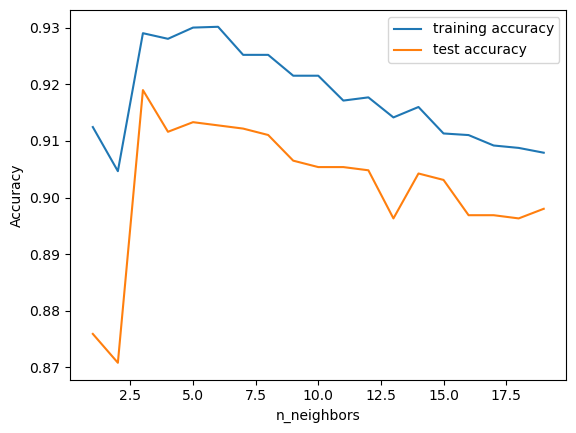

In [19]:


training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();



In [20]:
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model 
knn.fit(X_train,y_train)
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

K-Nearest Neighbors : Accuracy on training Data: 0.929
K-Nearest Neighbors : Accuracy on test Data: 0.919

K-Nearest Neighbors : f1_score on training Data: 0.925
K-Nearest Neighbors : f1_score on test Data: 0.915

K-Nearest Neighborsn : Recall on training Data: 0.934
Logistic Regression : Recall on test Data: 0.935



In [21]:

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [22]:


# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [23]:
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [24]:
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.925
Support Vector Machine : Accuracy on test Data: 0.915

Support Vector Machine : f1_score on training Data: 0.920
Support Vector Machine : f1_score on test Data: 0.910

Support Vector Machine : Recall on training Data: 0.926
Support Vector Machine : Recall on test Data: 0.929

Support Vector Machine : precision on training Data: 0.914
Support Vector Machine : precision on test Data: 0.892


In [25]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.2],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.939
Support Vector Machine : Accuracy on test Data: 0.917

Support Vector Machine : f1_score on training Data: 0.936
Support Vector Machine : f1_score on test Data: 0.914

Support Vector Machine : Recall on training Data: 0.954
Support Vector Machine : Recall on test Data: 0.945

Support Vector Machine : precision on training Data: 0.918
Support Vector Machine : precision on test Data: 0.885


In [39]:

# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.4],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.945
Support Vector Machine : Accuracy on test Data: 0.922

Support Vector Machine : f1_score on training Data: 0.941
Support Vector Machine : f1_score on test Data: 0.917

Support Vector Machine : Recall on training Data: 0.948
Support Vector Machine : Recall on test Data: 0.935

Support Vector Machine : precision on training Data: 0.935
Support Vector Machine : precision on test Data: 0.900


In [40]:

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       946
           1       0.90      0.94      0.92       819

    accuracy                           0.92      1765
   macro avg       0.92      0.92      0.92      1765
weighted avg       0.92      0.92      0.92      1765



In [41]:
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [42]:


# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)
acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.798
Naive Bayes Classifier : Accuracy on test Data: 0.806

Naive Bayes Classifier : f1_score on training Data: 0.780
Naive Bayes Classifier : f1_score on test Data: 0.789

Naive Bayes Classifier : Recall on training Data: 0.765
Naive Bayes Classifier : Recall on test Data: 0.780

Naive Bayes Classifier : precision on training Data: 0.795
Naive Bayes Classifier : precision on test Data: 0.798


In [43]:

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       946
           1       0.90      0.94      0.92       819

    accuracy                           0.92      1765
   macro avg       0.92      0.92      0.92      1765
weighted avg       0.92      0.92      0.92      1765



In [44]:
storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [45]:


# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=30)

In [46]:

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)


In [47]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))


Decision Tree : Accuracy on training Data: 0.954
Decision Tree : Accuracy on test Data: 0.925

Decision Tree : f1_score on training Data: 0.951
Decision Tree : f1_score on test Data: 0.921

Decision Tree : Recall on training Data: 0.953
Decision Tree : Recall on test Data: 0.935

Decision Tree : precision on training Data: 0.949
Decision Tree : precision on test Data: 0.907


In [48]:


#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))



              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       946
           1       0.91      0.94      0.92       819

    accuracy                           0.93      1765
   macro avg       0.92      0.93      0.92      1765
weighted avg       0.93      0.93      0.93      1765



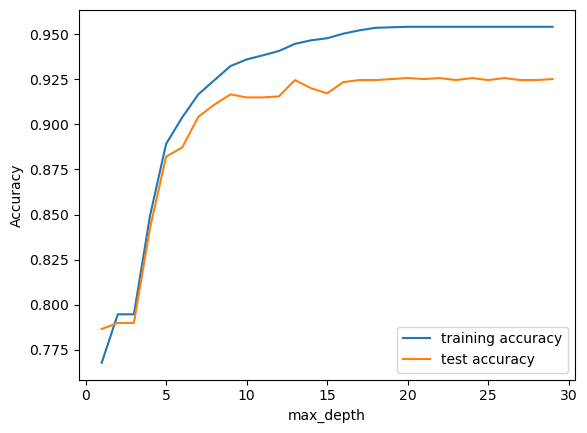

In [49]:


training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();



In [50]:


#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)



In [51]:


# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)



RandomForestClassifier(n_estimators=10)

In [52]:


#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))



Random Forest : Accuracy on training Data: 0.954
Random Forest : Accuracy on test Data: 0.922

Random Forest : f1_score on training Data: 0.951
Random Forest : f1_score on test Data: 0.918

Random Forest : Recall on training Data: 0.963
Random Forest : Recall on test Data: 0.940

Random Forest : precision on training Data: 0.940
Random Forest : precision on test Data: 0.907


In [53]:
print(metrics.classification_report(y_test, y_test_forest))


              precision    recall  f1-score   support

          -1       0.95      0.91      0.93       946
           1       0.90      0.94      0.92       819

    accuracy                           0.92      1765
   macro avg       0.92      0.92      0.92      1765
weighted avg       0.92      0.92      0.92      1765



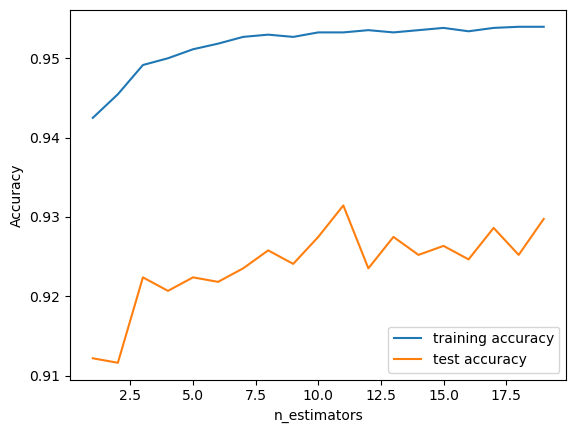

In [54]:


training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();



In [55]:


# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=11)

# fit the model 
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))
print(metrics.classification_report(y_test, y_test_forest))


Random Forest : Accuracy on training Data: 0.953
Random Forest : Accuracy on test Data: 0.929

Random Forest : f1_score on training Data: 0.950
Random Forest : f1_score on test Data: 0.925

Random Forest : Recall on training Data: 0.963
Random Forest : Recall on test Data: 0.951

Random Forest : precision on training Data: 0.938
Random Forest : precision on test Data: 0.907
              precision    recall  f1-score   support

          -1       0.96      0.91      0.93       946
           1       0.90      0.95      0.93       819

    accuracy                           0.93      1765
   macro avg       0.93      0.93      0.93      1765
weighted avg       0.93      0.93      0.93      1765



In [56]:


#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)



In [57]:


# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)



GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [58]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))



Gradient Boosting Classifier : Accuracy on training Data: 0.951
Gradient Boosting Classifier : Accuracy on test Data: 0.924

Gradient Boosting Classifier : f1_score on training Data: 0.949
Gradient Boosting Classifier : f1_score on test Data: 0.920

Gradient Boosting Classifier : Recall on training Data: 0.961
Gradient Boosting Classifier : Recall on test Data: 0.945

Gradient Boosting Classifier : precision on training Data: 0.937
Gradient Boosting Classifier : precision on test Data: 0.896


In [59]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.95      0.90      0.93       946
           1       0.90      0.95      0.92       819

    accuracy                           0.92      1765
   macro avg       0.92      0.92      0.92      1765
weighted avg       0.92      0.92      0.92      1765



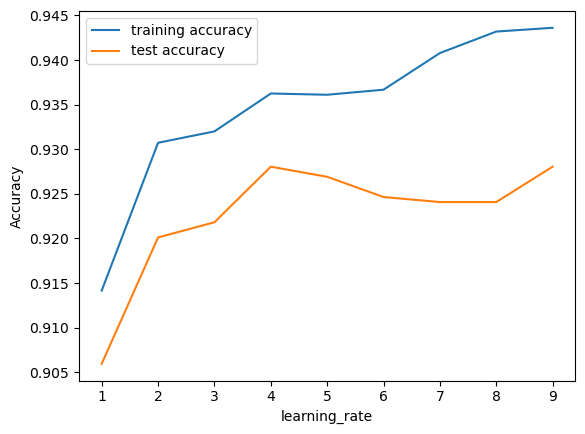

In [60]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [61]:


# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.9)

# fit the model 
gbc.fit(X_train,y_train)



GradientBoostingClassifier(learning_rate=0.9, max_depth=4)

In [62]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))



Gradient Boosting Classifier : Accuracy on training Data: 0.952
Gradient Boosting Classifier : Accuracy on test Data: 0.920

Gradient Boosting Classifier : f1_score on training Data: 0.949
Gradient Boosting Classifier : f1_score on test Data: 0.916

Gradient Boosting Classifier : Recall on training Data: 0.961
Gradient Boosting Classifier : Recall on test Data: 0.934

Gradient Boosting Classifier : precision on training Data: 0.938
Gradient Boosting Classifier : precision on test Data: 0.898


In [63]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       946
           1       0.90      0.93      0.92       819

    accuracy                           0.92      1765
   macro avg       0.92      0.92      0.92      1765
weighted avg       0.92      0.92      0.92      1765



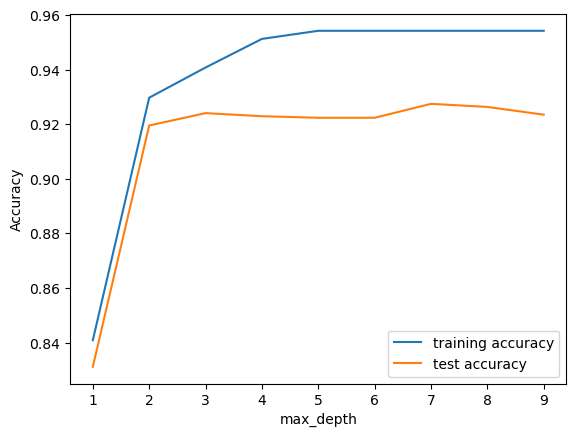

In [64]:


training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();



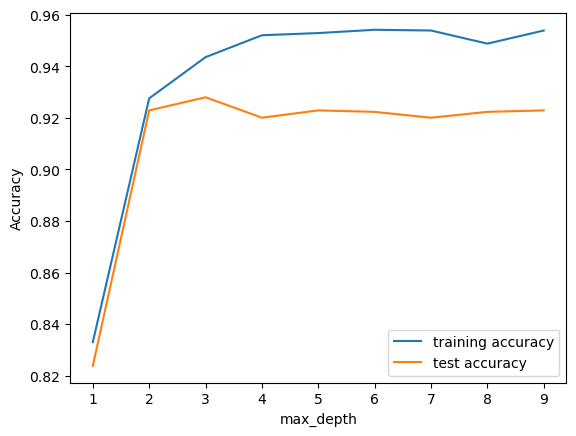

In [65]:


training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.9)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();



In [66]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [67]:


#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)



0:	learn: 0.5532097	total: 48ms	remaining: 47.9s
1:	learn: 0.4597186	total: 50.1ms	remaining: 25s
2:	learn: 0.3937448	total: 53.6ms	remaining: 17.8s
3:	learn: 0.3490827	total: 57ms	remaining: 14.2s
4:	learn: 0.3155651	total: 59ms	remaining: 11.7s
5:	learn: 0.2977122	total: 61.6ms	remaining: 10.2s
6:	learn: 0.2808337	total: 63.6ms	remaining: 9.02s
7:	learn: 0.2722754	total: 67.2ms	remaining: 8.33s
8:	learn: 0.2608886	total: 69.9ms	remaining: 7.7s
9:	learn: 0.2518910	total: 72.5ms	remaining: 7.17s
10:	learn: 0.2436083	total: 74.6ms	remaining: 6.71s
11:	learn: 0.2359768	total: 76.7ms	remaining: 6.31s
12:	learn: 0.2313849	total: 79.3ms	remaining: 6.02s
13:	learn: 0.2266259	total: 81.3ms	remaining: 5.72s
14:	learn: 0.2232210	total: 83.2ms	remaining: 5.47s
15:	learn: 0.2209051	total: 85.2ms	remaining: 5.24s
16:	learn: 0.2168295	total: 87.2ms	remaining: 5.04s
17:	learn: 0.2131036	total: 89.8ms	remaining: 4.9s
18:	learn: 0.2105338	total: 91.7ms	remaining: 4.74s
19:	learn: 0.2069345	total: 93.7

In [68]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))



CatBoost Classifier : Accuracy on training Data: 0.953
CatBoost Classifier : Accuracy on test Data: 0.922

CatBoost Classifier : f1_score on training Data: 0.951
CatBoost Classifier : f1_score on test Data: 0.918

CatBoost Classifier : Recall on training Data: 0.962
CatBoost Classifier : Recall on test Data: 0.938

CatBoost Classifier : precision on training Data: 0.940
CatBoost Classifier : precision on test Data: 0.898


In [69]:
print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       946
           1       0.90      0.94      0.92       819

    accuracy                           0.92      1765
   macro avg       0.92      0.92      0.92      1765
weighted avg       0.92      0.92      0.92      1765



In [70]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))

0:	learn: 0.5532097	total: 2.27ms	remaining: 2.26s
1:	learn: 0.4597186	total: 4.83ms	remaining: 2.41s
2:	learn: 0.3937448	total: 6.92ms	remaining: 2.3s
3:	learn: 0.3490827	total: 9.04ms	remaining: 2.25s
4:	learn: 0.3155651	total: 11.2ms	remaining: 2.22s
5:	learn: 0.2977122	total: 13.2ms	remaining: 2.19s
6:	learn: 0.2808337	total: 15.3ms	remaining: 2.17s
7:	learn: 0.2722754	total: 17.3ms	remaining: 2.14s
8:	learn: 0.2608886	total: 19.3ms	remaining: 2.12s
9:	learn: 0.2518910	total: 21.4ms	remaining: 2.12s
10:	learn: 0.2436083	total: 23.5ms	remaining: 2.11s
11:	learn: 0.2359768	total: 25.5ms	remaining: 2.1s
12:	learn: 0.2313849	total: 27.5ms	remaining: 2.09s
13:	learn: 0.2266259	total: 29.6ms	remaining: 2.08s
14:	learn: 0.2232210	total: 31.5ms	remaining: 2.07s
15:	learn: 0.2209051	total: 34ms	remaining: 2.09s
16:	learn: 0.2168295	total: 36.2ms	remaining: 2.09s
17:	learn: 0.2131036	total: 38.5ms	remaining: 2.1s
18:	learn: 0.2105338	total: 40.5ms	remaining: 2.09s
19:	learn: 0.2069345	total:

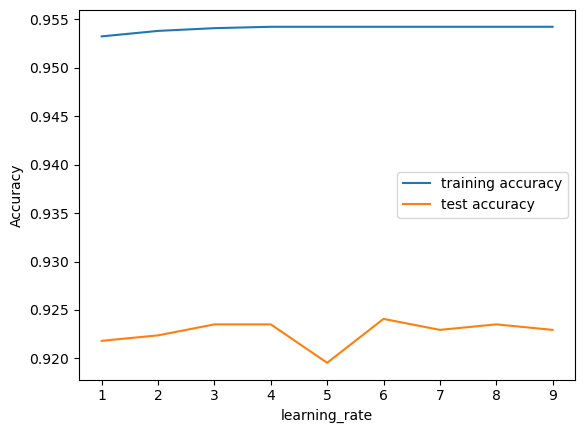

In [71]:


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();



In [72]:

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)


In [74]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [75]:


#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))



Multi-layer Perceptron : Accuracy on training Data: 0.943
Multi-layer Perceptron : Accuracy on test Data: 0.925

Multi-layer Perceptron : f1_score on training Data: 0.941
Multi-layer Perceptron : f1_score on test Data: 0.941

Multi-layer Perceptron : Recall on training Data: 0.966
Multi-layer Perceptron : Recall on test Data: 0.962

Multi-layer Perceptron : precision on training Data: 0.917
Multi-layer Perceptron : precision on test Data: 0.886


In [76]:
storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)


In [78]:

#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })


In [79]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

# dispalying total result
sorted_result



,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.929,0.925,0.963,0.938
1,Multi-layer Perceptron,0.925,0.923,0.966,0.917
2,Decision Tree,0.925,0.921,0.953,0.949
3,CatBoost Classifier,0.922,0.918,0.962,0.940
4,Support Vector Machine,0.922,0.917,0.948,0.935
5,Gradient Boosting Classifier,0.920,0.916,0.961,0.938
6,K-Nearest Neighbors,0.919,0.915,0.934,0.922
7,Naive Bayes Classifier,0.806,0.789,0.765,0.795
8,Logistic Regression,0.801,0.788,0.810,0.793
